___
## Ciência dos Dados - PROJETO 3 - INSPER

___
### Feito por: Theo Barbara, Abel Cavalcante, Gustavo Pierre e Victor Jurdi
___

# Wines Review

___

## A. INTRODUÇÃO

Para o Projeto 3 de Ciências dos Dados, o grupo escolheu trabalhar com vinhos. O nosso DataSet contém 10 variavéis(Pais de origem, descrição do vinho, designação, pontos na avaliação, preço, provincia, região, variedade e a adega produtora) e temos como objetivo procurar prever o preço do vinho através das variavéis mais qualificadas, que serão, o país, os pontos (nota do vinho) e o tipo da uva.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

### BASE DE DADOS

Em primeira instância, as bibliotecas foram importadas e os dadeos foram filtrados:

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from operator import itemgetter
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor

In [2]:
x=pd.read_csv('winemag-data_first150k.csv')
del x["Unnamed: 0"]
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Após isso, foi criado uma nova coluna com a frequência relativa dos tipos de uva. isso é feito pois, como há diversos vinhos extremamente raros, acabariam não fazendo tanta  relevância na nossa análise. Assim, os vinhos com frequência menor que 0.5% foram deletados do dataset.

In [3]:
dic = {}
dic2 = {}
lista = []
lista2=[]
i=0

for e in x.variety:
    if e not in dic:
        dic[e] = 1
    elif e in dic:
        dic[e] +=1

for e in dic:
    if dic[e] > 0:
        lista.append(dic[e]/len(dic))
        
for e in x.variety:
    if e not in dic2:
        dic2[e] = 1

for e in dic2:
    dic2[e] = lista[i]
    i+=1
    
for uva in x.variety:
    lista2.append(dic2[uva])
    
x["Frequencia"] = lista2
novo_x = x[x.Frequencia>0.5]

novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342


Por fim, criamos 

In [4]:
novo_x.loc[(novo_x.price<50),'Preço'] = 'Até 50'
novo_x.loc[(novo_x.price>50)&(novo_x.price<=200),'Preço'] = 'Até 200'
novo_x.loc[(novo_x.price>200)&(novo_x.price<=400),'Preço'] = 'Até 400'
novo_x.loc[(novo_x.price>400)&(novo_x.price<=600),'Preço'] = 'Até 600'
novo_x.loc[(novo_x.price>600)&(novo_x.price<=800),'Preço'] = 'Até 800'
novo_x.loc[(novo_x.price>800)&(novo_x.price<=1000),'Preço'] = 'Até 1000'
novo_x.loc[(novo_x.price>1000)&(novo_x.price<=1500),'Preço'] = 'Até 1500'
novo_x.loc[(novo_x.price>2000),'Preço'] = 'Mais que 2000'

novo_x.loc[(novo_x.points<=80),'Pontos'] = '80 pontos'
novo_x.loc[(novo_x.points>80)&(novo_x.points<=85),'Pontos'] = '81 - 85 pontos'
novo_x.loc[(novo_x.points>85)&(novo_x.points<=90),'Pontos'] = '86 - 90 pontos'
novo_x.loc[(novo_x.points>90)&(novo_x.points<=95),'Pontos'] = '91 - 95 pontos'
novo_x.loc[(novo_x.points>95)&(novo_x.points<=100),'Pontos'] = '95 - 100 pontos'

novo_x.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia,Preço,Pontos
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165,Até 400,95 - 100 pontos
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000,Até 200,95 - 100 pontos
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342,Até 200,95 - 100 pontos
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342,Até 200,91 - 95 pontos
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342,Até 200,91 - 95 pontos


### ANÁLISE DESCRITIVA

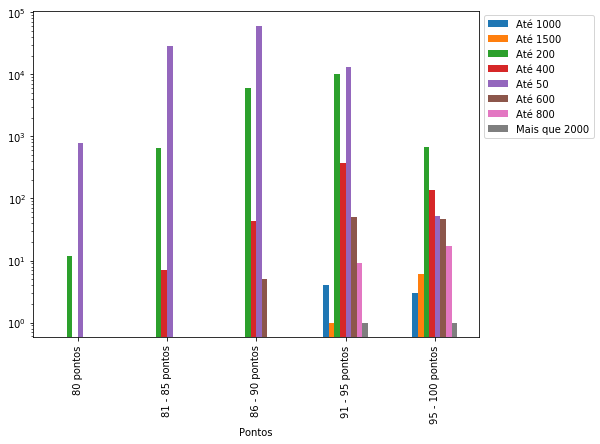

In [5]:
data = pd.crosstab(novo_x.Pontos, novo_x.Preço)
data.plot(kind='bar', figsize=(8,6));
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8));

In [6]:
novo_x.points.corr(novo_x.price)

0.4600421512441059

In [7]:
novo_x.Frequencia.corr(novo_x.price)

0.11149984361374775

In [8]:
novo_x.Frequencia.corr(novo_x.points)

0.06969229048694064

In [9]:
#plt.hist(novo_x["country"]);

In [10]:
#plt.hist(novo_x["Preço"]);

In [11]:
#plt.hist(novo_x.Pontos);

In [12]:
#plt.figure(figsize = (10, 10))
#sns.heatmap(novo_x.corr(), linewidth=0.5)
#plt.show()

In [13]:
dummy = pd.get_dummies(novo_x['variety'])
dummy.head()

,Aglianico,Albariño,Barbera,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Carmenère,Champagne Blend,Chardonnay,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
novo_x = pd.concat([novo_x,dummy],axis=1)
novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,...,0,0,0,0,0,0,0,0,0,0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,...,1,0,0,0,0,0,0,0,0,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,...,0,0,0,0,0,0,0,0,0,0
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,...,0,0,0,0,0,0,0,0,0,0
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,...,0,0,0,0,0,0,0,0,0,0


In [15]:
novo_x = novo_x.dropna(subset=['price'])
novo_x.shape

(124172, 66)

In [16]:
novo_x.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'Frequencia', 'Preço',
       'Pontos', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', 'Nero d'Avola', 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Temp

___
## C. MODELOS DE PREDIÇÃO

Primeiro, o Dataset é separado em TREINAMENTO e TESTE

In [17]:
seed = 569

X_train, X_test, y_train, y_test = train_test_split(novo_x, novo_x.price, random_state = seed)

X_train

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
118334,US,New smoky oak dominates this Chardonnay. Under...,Searby Vineyard,85,45.0,California,Russian River Valley,Sonoma,Chardonnay,Nickel & Nickel,...,0,0,0,0,0,0,0,0,0,0
65634,US,Chards from this vineyard always show a typici...,Sleepy Hollow Vineyard,93,35.0,California,Santa Lucia Highlands,Central Coast,Chardonnay,Krutz,...,0,0,0,0,0,0,0,0,0,0
79618,France,"This lightweight red is on the herbal side, al...",Bourgogne Pinot Noir,84,16.0,Burgundy,Bourgogne,NaN,Pinot Noir,Simonnet-Febvre,...,0,0,0,0,0,0,0,0,0,0
11954,France,"Fully fruity right up front, this rounded wine...",Vieilles Vignes,90,25.0,Burgundy,Pouilly-Fuissé,NaN,Chardonnay,Collovray et Terrier,...,0,0,0,0,0,0,0,0,0,0
58591,Italy,Moscato d'Asti makes a light and fragrant dess...,Nivole,86,15.0,Piedmont,Asti,NaN,Moscato,Michele Chiarlo,...,0,0,0,0,0,0,0,0,0,0
88246,US,Old vine Pinot Gris? Sourced from the Jacob Ha...,Old Vine,88,18.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Boedecker Cellars,...,0,0,0,0,0,0,0,0,0,0
121788,Italy,Here's a gorgeous expression of Pinot Grigio f...,Benefizium Porer,88,21.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder,...,0,0,0,0,0,0,0,0,0,0
64281,Italy,An organic and biodynamic Prosecco with extra ...,Col di Manza Extra Dry,87,12.0,Veneto,Prosecco di Valdobbiadene,NaN,Prosecco,Perlage,...,0,0,0,0,0,0,0,0,0,0
46406,Italy,"Elegant and tight, this blend offers savory to...",Montessu,90,35.0,Sicily & Sardinia,Isola dei Nuraghi,NaN,Red Blend,Agricola Punica,...,0,0,0,0,0,0,0,0,0,0
63566,US,"Simple and direct, with blackberry, bacon, pep...",NaN,82,18.0,California,Central Coast,Central Coast,Syrah,Bin 36,...,0,0,0,1,0,0,0,0,0,0


o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [18]:
media_price = np.mean(X_train.price)
print('A média dos preços dos vinhos é de R$ {0}'.format(media_price))

media_points = np.mean(X_train.points)
print('A média das notas dos vinhos é de {0} pontos'.format(media_points))

A média dos preços dos vinhos é de R$ 33.77181114368242
A média das notas dos vinhos é de 87.82603700243747 pontos


o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [19]:
novo_x2 = novo_x[['points', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', "Nero d'Avola", 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend',
       'Torrontés', 'Viognier', 'White Blend', 'Zinfandel']]
y = novo_x[['price']]

X_train, X_test, y_train, y_test = train_test_split(novo_x2, y, random_state = seed)

In [20]:
erro = []
for k in range(1,5):
    clf = KNeighborsRegressor(k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    erro.append(mean_squared_error(y_test,y_pred))
    

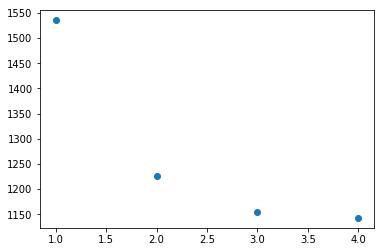

In [21]:
lista = [1,2,3,4]
plt.scatter(lista, erro)

In [22]:
clf = KNeighborsRegressor(3)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test,y_pred))

print('Com K = 3, temos uma estabilização da medida de erro')

1142.7641396611152
Com K = 3, temos uma estabilização da medida de erro


o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [23]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [24]:
novo_x.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'Frequencia', 'Preço',
       'Pontos', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', 'Nero d'Avola', 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Temp

In [25]:
X = novo_x[['points','Aglianico','Albariño','Barbera','Bordeaux-style Red Blend','Bordeaux-style White Blend','Cabernet Franc','Cabernet Sauvignon','Carmenère','Champagne Blend','Chardonnay','Chenin Blanc','Corvina, Rondinella, Molinara','Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera','Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot','Montepulciano', 'Moscato', 'Nebbiolo', "Nero d'Avola", 'Petite Sirah','Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port','Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend','Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé','Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz','Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend','Torrontés', 'Viognier', 'White Blend', 'Zinfandel']]

In [26]:
Y = novo_x['price']

In [27]:
results3 = regress(X, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     788.9
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        22:41:14   Log-Likelihood:            -6.0657e+05
No. Observations:              124172   AIC:                         1.213e+06
Df Residuals:                  124118   BIC:                         1.214e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -388.3430      2.506   -154.968      0.000    -393.255    -383.431
points                            4.8577      0.029    166.960      0.000       4.801       4.915
Aglianico                        -9.2288      1.960     -4.709      0.000     -13.070      -5.388
Albariño                        -15.9440      1.374    -11.604      0.000     -18.637     -13.251
Barbera                          -9.9028      1.023     -9.681      0.000     -11.908      -7.898
Bordeaux-style Red Blend          5.9562      0.498     11.953      0.000       4.980       6.933
Bordeaux-style White Blend       -1.7947      1.315     -1.365      0.172      -4.372       0.782
Cabernet Franc                   -4.0208      0.883     -4.554      0.000      -5.751      -2.290
Cabernet Sauvignon                2.6488      0.325      8.143      0.000       2.011       3.286
Carmenère                       -10.1634      1.161     -8.756      0.000     -12.438      -7.888
Champagne Blend                  30.8953      1.010     30.585      0.000      28.915      32.875
Chardonnay                       -5.3956      0.314    -17.206      0.000      -6.010      -4.781
Chenin Blanc                    -18.0728      1.254    -14.414      0.000     -20.530     -15.615
Corvina, Rondinella, Molinara     2.9444      0.892      3.302      0.001       1.196       4.692
Dolcetto                        -11.8000      1.731     -6.816      0.000     -15.193      -8.407
Gamay                           -17.8227      1.824     -9.772      0.000     -21.397     -14.248
Garganega                       -15.2994      1.800     -8.500      0.000     -18.827     -11.771
Garnacha                        -10.8235      1.584     -6.831      0.000     -13.929      -7.718
Gewürztraminer                  -13.1402      1.065    -12.336      0.000     -15.228     -11.052
Glera                           -13.4959      1.444     -9.347      0.000     -16.326     -10.666
Grenache                         -5.3399      1.297     -4.117      0.000      -7.882      -2.798
Grüner Veltliner                -16.3798      1.098    -14.922      0.000     -18.531     -14.228
Malbec                          -10.1895      0.588    -17.332      0.000     -11.342      -9.037
Meritage                         -0.1205      1.772     -0.068      0.946      -3.593       3.352
Merlot                           -4.4678      0.471     -9.476      0.000      -5.392      -3.544
Montepulciano                   -11.1113      1.912     -5.812      0.000     -14.858      -7.364
Moscato                         -13.0394      1.600     -8.148      0.000     -16.176      -9.903
Nebbiolo                         15.9137      0.828     19.216      0.000      14.291      17.537
Nero d'Avola                    -13.6202     

Como podemos analisar nos dados da regressão, o $P > |t|$ para as variáveis 'Bordeaux-style White Blend' , 'Meritage' e 'Tempranillo Blend' não são tão baixas, o que não nos permite rejeitar a hipótese nula, portanto seus betas são zero. Já para a probabilidade das variáveis restantes, podemos afirmar que se rejeita a hipótese nula, portanto seus respectivos betas são maiores que zero, considerando que as suas probabilidades foram baixas ou nulas.

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

Para a árvore, é necessário: Treinar o programa, testar usando o dataframe $X_{test}$ e ver se o resultado é satisfatório

In [28]:
regressor = DecisionTreeRegressor(random_state = seed)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Para ter uma idéia da acurácia do programa, foi plotado um histograma com as diferenças entre o preço real e o predito no dataframe $X_{teste}$

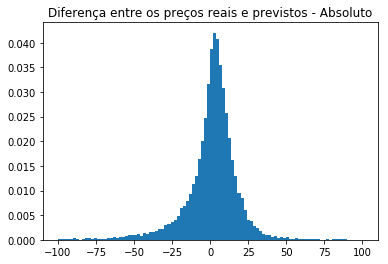

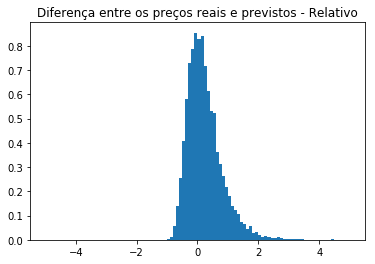

In [30]:
y_test_final=[]
for a in y_test.values:
    y_test_final.append(a[0])

y_test_final=np.array(y_test_final)
dif_abs = y_pred - y_test_final
dif_rel = (y_pred - y_test_final)/y_test_final

plt.hist(dif_abs, density = True, bins= 100, range=(-100,100));
plt.title("Diferença entre os preços reais e previstos - Absoluto")
plt.show();

plt.hist(dif_rel, density = True, bins= 100, range=(-5,5))
plt.title("Diferença entre os preços reais e previstos - Relativo")
plt.show();

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS